In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

In [2]:
data = pd.read_csv("spam.csv", encoding = 'latin -1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Distribution of Spam/Non - Spam

In [4]:
plt = pd.value_counts(data['v1'])

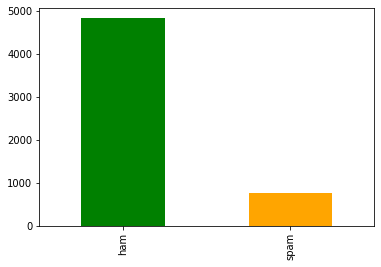

In [5]:
plt.plot(kind = 'bar', color = ["green","orange"])

## Text Ananlysis

In [6]:
from collections import Counter

In [7]:
df = Counter(" ".join(data[data['v1'] == 'ham']['v2']).split()).most_common(20)

In [8]:
type(df)

list

In [9]:
df1 = pd.DataFrame(df)

In [10]:
df1.rename(columns = {0 : "Words in Non - Spam", 1 : "Count"})

,Words in Non - Spam,Count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


In [11]:
df0 = Counter(" ".join(data[data['v1'] == 'spam']['v2']).split()).most_common(20)

In [12]:
df0

[('to', 604),
 ('a', 358),
 ('your', 187),
 ('call', 185),
 ('or', 185),
 ('the', 178),
 ('2', 169),
 ('for', 169),
 ('you', 164),
 ('is', 143),
 ('Call', 136),
 ('on', 135),
 ('have', 128),
 ('and', 119),
 ('from', 116),
 ('ur', 107),
 ('with', 101),
 ('&', 98),
 ('4', 93),
 ('of', 93)]

In [13]:
df2 = pd.DataFrame(df0)

In [14]:
df2.rename(columns = {0 : "Words in Spam", 1 : "Count"})

,Words in Spam,Count
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


## Feature Engineering

In [15]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

In [16]:
X = f.fit_transform(data["v2"])

In [17]:
np.shape(X)

(5572, 8404)

## Predictive Analysis

In [18]:
data["v1"] = data["v1"].map({'spam' : 1, 'ham' : 0})

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size = 0.25, random_state = 42)

## Multinomial Naive Bayes Classifier

In [20]:
list_alpha = np.arange(1/100000, 20, 0.11)

In [21]:
score_train = np.zeros(len(list_alpha))

In [22]:
score_test = np.zeros(len(list_alpha))

In [23]:
recall_test = np.zeros(len(list_alpha))

In [24]:
precision_test = np.zeros(len(list_alpha))

In [25]:
count = 0

In [26]:
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha = alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count] = bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count += 1

In [27]:
#c_ does horizontal concatenation
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

In [28]:
models.head(20)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998086,0.970567,0.905759,0.882653
1,0.11001,0.996889,0.974874,0.926702,0.893939
2,0.22001,0.997128,0.975592,0.926702,0.898477
3,0.33001,0.996650,0.974156,0.926702,0.889447
4,0.44001,0.996171,0.976310,0.926702,0.903061
5,0.55001,0.995693,0.975592,0.926702,0.898477
6,0.66001,0.995693,0.974874,0.926702,0.893939
7,0.77001,0.995453,0.976310,0.926702,0.903061
8,0.88001,0.995453,0.976310,0.926702,0.903061
9,0.99001,0.995453,0.976310,0.916230,0.911458


In [29]:
best_index = models['Test Precision'].idxmax()

In [30]:
best_index

163

In [31]:
models.iloc[best_index, :]

alpha             17.930010
Train Accuracy     0.978703
Test Accuracy      0.965542
Test Recall        0.748691
Test Precision     1.000000
Name: 163, dtype: float64

In [32]:
models[models['Test Precision'] == 1].head(5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
163,17.93001,0.978703,0.965542,0.748691,1.0
164,18.04001,0.978703,0.965542,0.748691,1.0
165,18.15001,0.978703,0.965542,0.748691,1.0
166,18.26001,0.978703,0.965542,0.748691,1.0
167,18.37001,0.978703,0.965542,0.748691,1.0


In [33]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha = list_alpha[best_index])
bayes.fit(X_train, y_train)

MultinomialNB(alpha=17.93001)

In [34]:
metrics.confusion_matrix(y_test, bayes.predict(X_test))

array([[1202,    0],
       [  48,  143]])